# Summary: Introduction to Probability Distributions

A Summary about the used python libraries and functions in this section.

See also [*PMF vs. CDF*](pmf%20and%20cdf.ipynb) for more comparison between PMF and CDF calculations.

PMF is using with discrete random variables, while PDF is using with continuous random variables. CDF can be used with both.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Random Variables

**Situation**: *Rolling a dice 2 times.*

The `np.random.choice()` function is used to generate random variables. The function has the following parameters:
- `a`: the array from which to generate the random variables
- `size`: the number of time to draw from the array
- `replace`: whether to replace the drawn value back into the array
- `p`: the probability of drawing each value in the array

In [14]:
# create a list of numbers from 1 to 6, like a die
die_6 = range(1, 7)

# simulate rolling the die 2 times
values = np.random.choice(a=die_6, size=2, replace=True)

values  # [5, 4] -> means the first roll was 5 and the second roll was 4

array([5, 4])

## Probability Mass Function (PMF)

A probability *mass function (PMF)* is a type of probability distribution that defines the probability of observing a particular value of a discrete random variable.

**Situation**: *Throwing a fair coin 10 times*

The `stats.binom.pmf()` functions is used to calculate the probability of observing a particular value of a binomial distribution. The function has the following parameters:
- `x`: the value for how many times the event occurs, like the number of heads
- `n`: the number of trials
- `p`: the probability of success

This function is always the calculating for a specific value. If you choose `x=5` it will calculate the probability of exactly 5 heads.

For a range of values you can use the CDF function or calculate the addition between more PMF values.

### Plotting Distribution

Sum of all probabilities: 0.9999999999999998


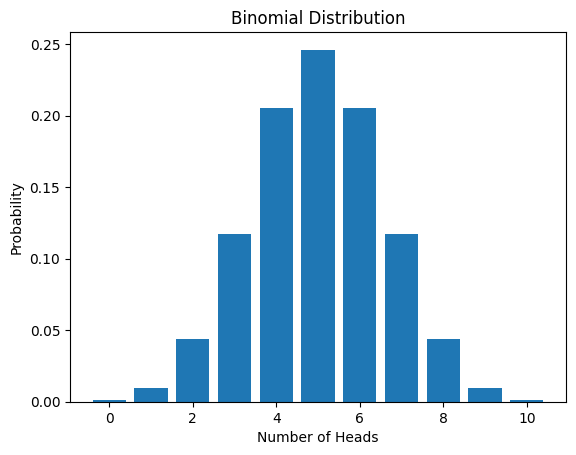

In [52]:
# Plotting bar chart 
throws = 10
prob = 0.5

probs = [stats.binom.pmf(i, throws, prob) for i in range(throws + 1)]   # sum of all values == 1
print(f"Sum of all probabilities: {sum(probs)}")

plt.bar(range(throws + 1), probs)
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.title('Binomial Distribution')
plt.show()

### Using PMF for calculating of a specific value

**Situation**: *I have a fair coin, 10 tries and want to know what is the probability of getting 5 heads.**

5 Heads is given in different paths. We have paths like:
- H H H H H T T T T T
- H H H H T H T T T T
- ...

$$ P(X=5) = P(X=5) $$

In [20]:
tries = 10
prob_each_site = 0.5
x = 5

prob_for_5_heads = stats.binom.pmf(x, tries, prob_each_site)
print(f"Probability of getting 5 heads: {prob_for_5_heads}")

Probability of getting 5 heads: 0.24609375


### Using PMF for calculating of a range of values

**Situation**: *I have a fair coin, 10 tries and want to know what is the probability of getting 9 or fewer heads.*

$$ P (X \leq 9) = P(X=0) + P(X=1) + P(X=2) + ... + P(X=9) $$
$$ or $$
$$ P(X \leq 9) = 1 - P(X=10) $$

![Binomial Distribution](../../Informations/Images/Binomial-Distribution-PMF-Probability-over-a-Range.gif)

In [31]:
tries = 10
prob_each_site = 0.5
x = 9

prob_for_9fewer_heads = 1 - stats.binom.pmf(x + 1, tries, prob_each_site)
print(f"Probability of getting 9 or fewer heads: {prob_for_9fewer_heads}")

Probability of getting 9 or fewer heads: 0.9990234375


## Cumulative Distribution Function (CDF)

The *cumulative distribution function* for a discrete random variable can be derived from the probability mass function.

**Situation**: *Throwing a fair coin 10 times*

The `stats.binom.cdf()` functions is used to calculate the cumulative probability of observing a value less than or equal to a particular value of a binomial distribution. The function has the following parameters:
- `x`: the value for how many times the event occurs, like the number of heads
- `n`: the number of trials
- `p`: the probability of success

This function is always the calculating for a range of values. If you choose `x=5` it will calculate the probability of getting 5 or fewer heads.

For a specific value you can use the PMF function or calculate the difference between two CDF values.

![Cumulative Distribution Function](../../Informations/Images/cdf.gif)

### Plotting Distribution

Sum of all probabilities: 6.0


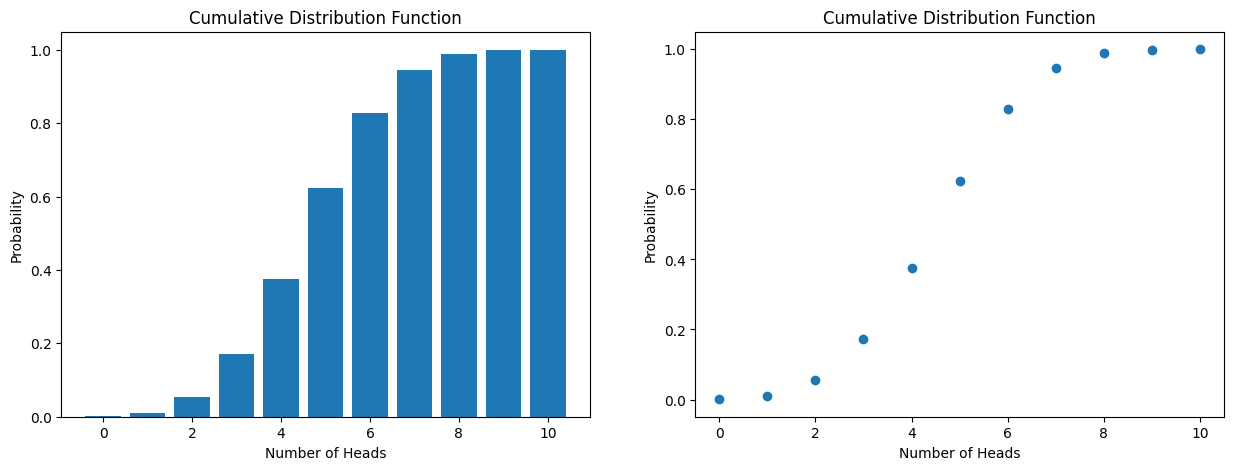

In [49]:
# Plotting bar chart 
throws = 10
prob = 0.5

probs = [stats.binom.cdf(i, throws, prob) for i in range(throws + 1)] 
print(f"Sum of all probabilities: {sum(probs)}")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].bar(range(throws + 1), probs)
axes[0].set_xlabel('Number of Heads')
axes[0].set_ylabel('Probability')
axes[0].set_title('Cumulative Distribution Function')

axes[1].scatter(range(throws + 1), probs)
axes[1].set_xlabel('Number of Heads')
axes[1].set_ylabel('Probability')
axes[1].set_title('Cumulative Distribution Function')

plt.show()

Every bar is the sum of the current and all previous bars, like the bar for 5 is the sum of the bars for 0, 1, 2, 3, 4, and 5.

### Using CDF for calculating of a specific value

**Situation**: *I have a fair coin, 10 tries and want to know what is the probability of getting 5 heads.**

5 Heads is given in different paths. We have paths like:
- H H H H H T T T T T
- H H H H T H T T T T
- ...

$$ P(X=5) = P(X \leq 5) - P(X \leq 4) $$

In [53]:
tries = 10
prob_each_site = 0.5
x = 5

prob_for_5_heads = stats.binom.cdf(x, tries, prob_each_site) - stats.binom.cdf(x - 1, tries, prob_each_site)
print(f"Probability of getting 5 heads: {prob_for_5_heads}")

Probability of getting 5 heads: 0.24609375


### Using CDF for calculating of a range of values

**Situation**: *I have a fair coin, 10 tries and want to know what is the probability of getting 9 or fewer heads.*

$$ P (X \leq 9) = P(X \leq 9) $$

In [55]:
tries = 10
prob_each_site = 0.5
x = 9

prob_for_9fewer_heads = stats.binom.cdf(x, tries, prob_each_site)
print(f"Probability of getting 9 or fewer heads: {prob_for_9fewer_heads}")

Probability of getting 9 or fewer heads: 0.9990234375


## Probability Density Function (PDF)

It`s not possible to calculate the probability of a specific value for a continuous random variable. The probability of a specific value is always 0.

We can calculate the area under the curve using the *cumulative distribution function (CDF)*.

**Situation**: *We know that women´s heights have a mean of 167.64 cm with a std of 8 cm. What´s the probability that a randomly chosen woman is less than 158 cm tall.*

![Probability Density Function](../../Informations/Images/norm_pdf_167_8_filled.svg)

In [60]:
h = 158
mean = 167.64
std = 8

stats.norm.cdf(h, mean, std)

np.float64(0.11410165094812996)

## Probability Density Functions (PDF) and Cumulative Distribution Function (CDF)

We can take the difference between two overlapping ranges to calculate the probability that a random selection will be within a range of values for continuous distributions.

**Situation**: *We know that women´s heights have a mean of 167.64 cm with a std of 8 cm. What´s the probability for randomly observing a woman **between** 165 cm and 175 cm tall.*

![Probability Density Function](../../Informations/Images/Normal-PDF-Range.gif)

In [62]:
h1 = 165
h2 = 175
mean = 167.64
std = 8

stats.norm.cdf(h2, mean, std) - stats.norm.cdf(h1, mean, std)

np.float64(0.45051363932628175)

**Situation**: *Whats the probability for randomly observing a woman **taller** than 172 cm?*

![Probability Density Function](../../Informations/Images/norm_pdf_167_8_filled2.svg)

In [63]:
h = 172
mean = 167.64
std = 8

1 - stats.norm.cdf(h, mean, std)

np.float64(0.29287675880580455)

**Situation**: *Whats the probability for randomly observing a woman **shorter** than 172 cm?*

In [64]:
h = 172
mean = 167.64
std = 8

stats.norm.cdf(h, mean, std)

np.float64(0.7071232411941955)

The addition of both probabilities is 1.

In [67]:
h = 172
mean = 167.64
std = 8

#         Taller than h            +         Shorter than h
(1 - stats.norm.cdf(h, mean, std)) + stats.norm.cdf(h, mean, std)

np.float64(1.0)